Відрізки ізоляції:
[-2.5, -2.0]

Корені рівняння (метод бісекції з точністю = 0.000161 ):
У проміжку ізоляції [-2.5, -2.0] корінь = -2.029175 +-O(0.000161)


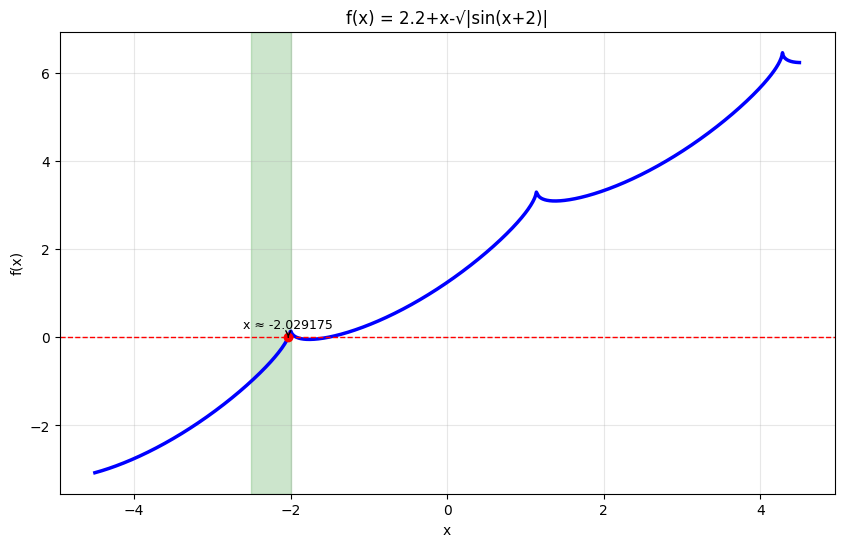

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math


# 1 display graph of the function
def f(x):
    return 2.2 + x - math.sqrt(abs(math.sin(x + 2)))


x = np.linspace(-4.5, 4.5, 1000)
y = [f(xi) for xi in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y, color="blue", linewidth=2.5)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
plt.title("f(x) = 2.2+x-√|sin(x+2)|")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, alpha=0.3)

# isolation segments of the roots
a, b = -4.5, 4.5
h = 0.5
isol_segs = []

for xi in np.arange(a, b, h):
    try:
        if f(xi) * f(xi + h) <= 0:
            isol_segs.append([xi, xi + h])
    except:
        continue

print("Відрізки ізоляції:")
for seg in isol_segs:
    print(f"[{seg[0]}, {seg[1]}]")
    plt.axvspan(seg[0], seg[1], alpha=0.2, color="green")


# 3 bisection method
def bisection(f, a, b, tolerance=1.61e-4, max_iter=100):
    if f(a) * f(b) >= 0:
        print(f"Функція має однаковий знак на кінцях відрізка [{a}, {b}]")
        return None

    a_n = a
    b_n = b

    for n in range(max_iter):
        m_n = (a_n + b_n) / 2
        f_m_n = f(m_n)

        if abs(f_m_n) < tolerance:
            return m_n

        if f(a_n) * f_m_n < 0:
            b_n = m_n
        else:
            a_n = m_n

        if abs(b_n - a_n) < tolerance:
            return (a_n + b_n) / 2

    print(f"Метод не збігся після {max_iter} ітерацій.")
    return (a_n + b_n) / 2


# find roots
tolerance = 1.61e-4
print("\nКорені рівняння (метод бісекції з точністю =", tolerance, "):")

for seg in isol_segs:
    root = bisection(f, seg[0], seg[1])
    if root is not None:
        print(
            f"У проміжку ізоляції [{seg[0]}, {seg[1]}] корінь = {root:.6f} +-O({tolerance})"
        )

        plt.plot(root, 0, "ro", markersize=6)
        plt.annotate(
            f"x ≈ {root:.6f}",
            xy=(root, 0),
            xytext=(root, 0.2),
            fontsize=9,
            ha="center",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
        )

plt.show()
